<span style="color: rgba(55,227,27,1); font-size: 30px;">Лабораторна робота №3</span><br>
<span style="color: rgba(55,227,27,1); font-size: 24px;">студентки групи МІТ-31</span><br>
<span style="color: rgba(55,227,27,1); font-size: 24px;">Шмат Катерини Сергіївни</span><br>
<span style="color: rgba(55,227,27,1); font-size: 26px;">Частина перша</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples = 1024 , n_features = 7, class_sep=0.98, random_state = None )

In [12]:
df = pd.DataFrame(X, y, columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,-0.397918,0.818374,-0.644750,-0.639306,-0.090568,0.428607,-1.086356
0,1.074314,-1.239479,-0.250104,-0.073803,0.666188,-0.853629,-0.738055
1,-1.399936,1.277803,1.018304,0.438309,-1.014760,0.537119,1.342815
0,0.419266,-1.244967,1.464766,0.586907,-0.070931,-0.321162,0.357064
1,-2.022877,1.843131,1.478130,-0.349930,-1.467726,-0.815199,1.562918


In [13]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
0,-0.065691,-0.801171,1.815164,1.080669,-0.421959,-0.738703,1.242320
1,-0.591902,0.410908,0.696034,-1.454902,-0.485280,-0.054758,-0.003128
1,-2.135162,2.577134,0.263689,-1.061479,-1.274592,-0.859944,0.382416
1,-2.110188,1.937879,1.510741,-1.502283,-1.524470,-1.368532,0.530541
0,-0.268096,-1.044673,2.841328,-1.761256,-0.754839,0.122435,-2.642347


<span style="color: rgba(55,227,27,1); font-size: 26px;">Classes in size</span>

In [14]:
print("size")
print(df['size'].unique())

size
[-1.08635622 -0.73805473  1.34281513 ...  0.38241632  0.53054125
 -2.64234716]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 1 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  1024 non-null   float64
 1   tip         1024 non-null   float64
 2   sex         1024 non-null   float64
 3   smoker      1024 non-null   float64
 4   day         1024 non-null   float64
 5   time        1024 non-null   float64
 6   size        1024 non-null   float64
dtypes: float64(7)
memory usage: 64.0 KB


<span style="color: rgba(55,227,27,1); font-size: 26px;">Description</span>

In [16]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.007296,-0.007372,-0.003844,0.013011,0.004979,-0.008754,-0.028271
std,1.220189,1.297873,1.334892,0.967853,0.886649,0.994060,1.026494
min,-3.653024,-2.572387,-4.150393,-2.882789,-2.613757,-2.764570,-3.453956
25%,-0.820251,-1.041003,-1.009913,-0.608850,-0.535514,-0.668503,-0.746300
50%,0.216498,-0.302746,0.217773,-0.010601,0.021061,-0.007964,0.021516
75%,0.831574,0.987504,1.047374,0.618261,0.584438,0.626702,0.681442
max,3.095773,3.983592,3.346622,3.300568,2.555619,3.197968,3.005403


<span style="color: rgba(55,227,27,1); font-size: 26px;">Data Classes from original dataset</span>

D:\Download\Apps\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


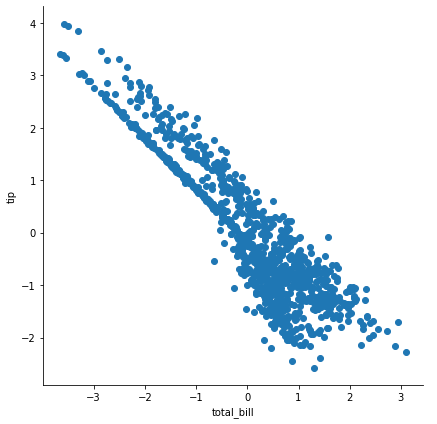

In [17]:
sns.FacetGrid(df, size=6) \
   .map(plt.scatter, "total_bill", "tip") \
   .add_legend()

plt.show()

<span style="color: rgba(55,227,27,1); font-size: 26px;">Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)</span>

In [18]:
features = list(df.columns[1:6])            	
target = df.columns[6]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:6]                         

# store response vector in "y"
y = df.iloc[:,6]                           


print(y.shape)
print(X.shape)

Features: ['tip', 'sex', 'smoker', 'day', 'time']
Target: size
(1024,)
(1024, 5)


<span style="color: rgba(55,227,27,1); font-size: 26px;">Converting Response Variable 'Size' to numbers to train model and add column</span>

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedsize'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [-3.45395612 -3.13465493 -2.92470692 ...  2.89121846  2.92482355
  3.00540254]
Response variable after encoding: [155 257 937 ... 658 712   7]


,total_bill,tip,sex,smoker,day,time,size,Encodedsize
0,0.926062,-0.972062,-0.413384,-0.437923,0.616149,-0.994343,-0.859999,216
0,0.727475,-0.308324,-1.259166,-0.004566,0.681939,0.474894,0.405332,667
0,-0.174757,-0.127789,0.716769,-0.344976,-0.251566,1.339679,0.188166,583
0,1.455320,-1.346155,-1.022058,0.005025,1.047168,-1.412103,1.024041,871
1,-0.394764,0.871237,-0.761447,0.155448,-0.064051,-0.165214,-0.822033,231
0,-0.065691,-0.801171,1.815164,1.080669,-0.421959,-0.738703,1.242320,919
1,-0.591902,0.410908,0.696034,-1.454902,-0.485280,-0.054758,-0.003128,504
1,-2.135162,2.577134,0.263689,-1.061479,-1.274592,-0.859944,0.382416,658
1,-2.110188,1.937879,1.510741,-1.502283,-1.524470,-1.368532,0.530541,712
0,-0.268096,-1.044673,2.841328,-1.761256,-0.754839,0.122435,-2.642347,7


<span style="color: rgba(55,227,27,1); font-size: 26px;">Classification Models</span><br>
<span style="color: rgba(55,227,27,1); font-size: 26px;">1 KNN Model</span>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [21]:
value = knn.predict([[3, 5, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedsize'] == 2, 'size'].values[0])

prediction value: [299]
Predicted Class -2.924706920187909


In [22]:
X_new = [[3, 5, 4, 2, 1], [5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([299, 299], dtype=int64)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[103 299]


<span style="color: rgba(55,227,27,1); font-size: 26px;">How to check the best value for K?</span>

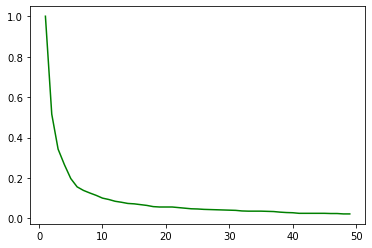

In [41]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

<span style="color: rgba(55,227,27,1); font-size: 26px;">KNN ACCURACY</span>

In [25]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.197265625


<span style="color: rgba(55,227,27,1); font-size: 26px;">Evaluation procedure: Train/test split</span>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [27]:
print(X_train.shape)
print(y_train.shape)

(614, 5)
(614,)


<span style="color: rgba(55,227,27,1); font-size: 26px;">KNN with Train Test</span>

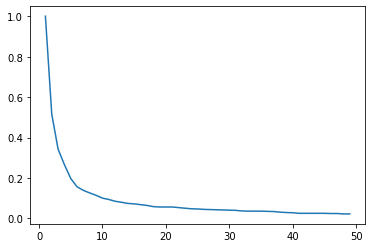

In [43]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X, y)
k_pred = knn.predict(X)

metrics.accuracy_score(y, k_pred)

0.0849609375